### ADVANCED STATISTICS FOR PHYSICS ANALYSIS, Physics of Data
###  Student: Matteo Guida 
### ID Number: 1211201

# Sheet 8

## Exercise 1

In [54]:
library(rjags)
library(coda)
data<- NULL
data$D <- c ( 4 , 5 , 4 , 1 , 0 , 4 , 3 , 4 , 0 , 6 ,3 , 3 , 4 , 0 , 2 , 6 , 3 , 3 , 5 , 4 , 5 , 3 , 1 , 4 , 4 , 1 , 5 , 5 , 3 , 4 , 2 , 5 , 2 , 2 , 3 , 4 , 2 , 1 , 3 , 2 ,1 , 1 , 1 , 1 , 1 , 3 , 0 , 0 , 1 , 0 , 1 , 1 , 0 , 0 , 3 , 1 , 0 , 3 , 2 , 2 ,0 , 1 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 2 , 1 , 0 , 0 , 0 , 1 , 1 , 0 , 2 ,2 , 3 , 1 , 1 , 2 , 1 , 1 , 1 , 1 , 2 , 4 , 2 , 0 , 0 , 0 , 1 , 4 , 0 , 0 , 0 ,1 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 1 , 0 , 0 )
data$N <-112
years<-1851:1962.

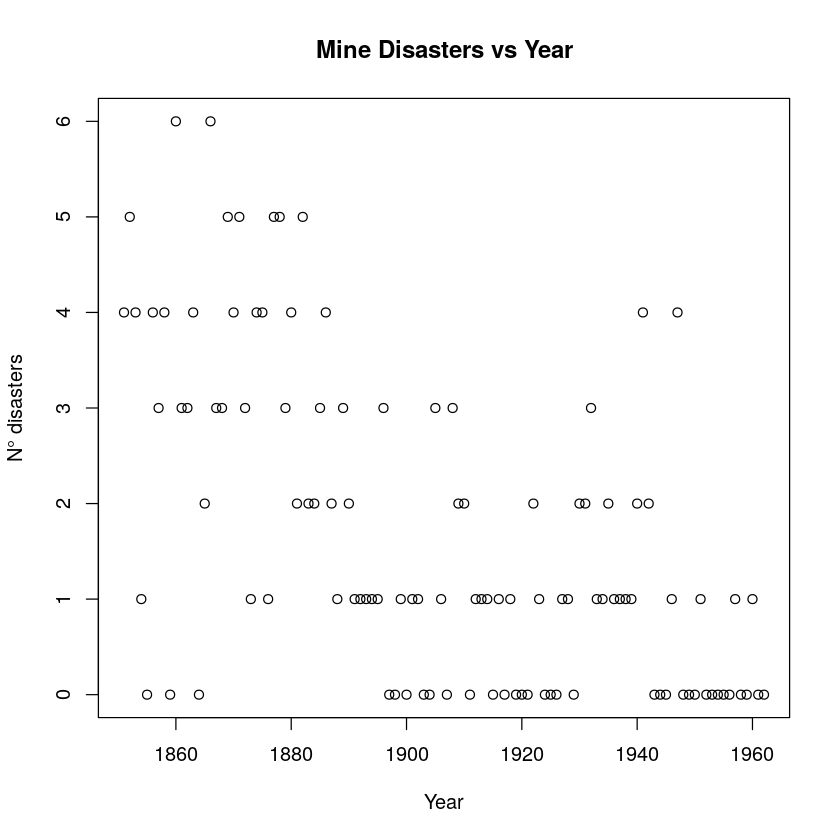

In [55]:
plot(years,data$D, main = 'Mine Disasters vs Year', xlab = 'Year', ylab = expression("N° disasters"))

In [96]:
# define the model using BUGS language
cat("model{
    # data likelihood
    for (t in 1:N){ 
    log(mu[t]) <- b0 + b1*step(t-tau)
    D[t] ~ dpois(mu[t])
    y[t] ~ dpois(mu[t])
    }
    
    # x ∼ dnorm(mu,tau) tau=1/sigma^2

    b0 ~ dnorm(0,1)
    b1 ~ dnorm(0,1)
    tau ~ dunif(1, N)
}", file="BUGS_model.txt")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 112
   Unobserved stochastic nodes: 115
   Total graph size: 901

Initializing model



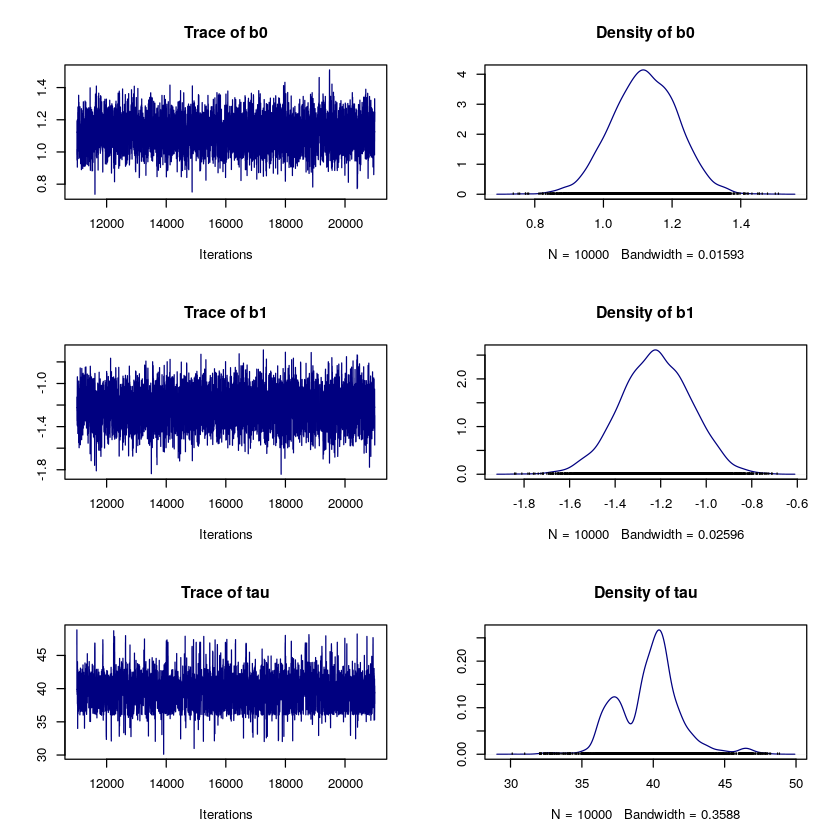

In [97]:
model<- "BUGS_model.txt"
inits <- NULL
inits$b0 <- 0
inits$b1 <- 0
inits$tau <- 50
# Read the model
jm <- jags.model(model ,data,inits)
# Burn-in part
update(jm , 10000)
# Extract samples from model-object
chain0 <- coda.samples(jm , c("b0", "b1","tau"), n.iter=10000)
#thin = 50
plot(chain0 , col="navy")

In [98]:
summary(chain0)


Iterations = 11001:21000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

      Mean      SD  Naive SE Time-series SE
b0   1.120 0.09485 0.0009485       0.001855
b1  -1.222 0.15454 0.0015454       0.002824
tau 39.739 2.19494 0.0219494       0.048334

2. Quantiles for each variable:

       2.5%    25%    50%    75%   97.5%
b0   0.9351  1.056  1.121  1.186  1.3002
b1  -1.5323 -1.326 -1.222 -1.117 -0.9271
tau 36.0620 38.020 39.996 40.882 44.6822


In [99]:
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain0.df))


 Correlation matrix: 
            b0          b1         tau
b0   1.0000000 -0.57403040 -0.29068608
b1  -0.5740304  1.00000000  0.01558417
tau -0.2906861  0.01558417  1.00000000


In [100]:
thinning<-c(2,20,40)

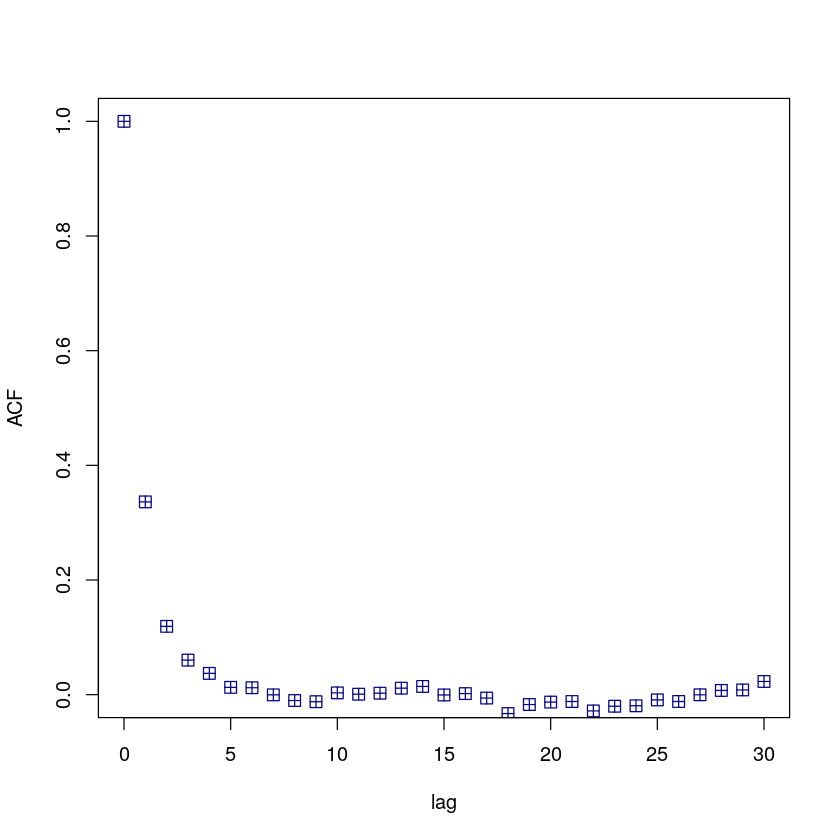

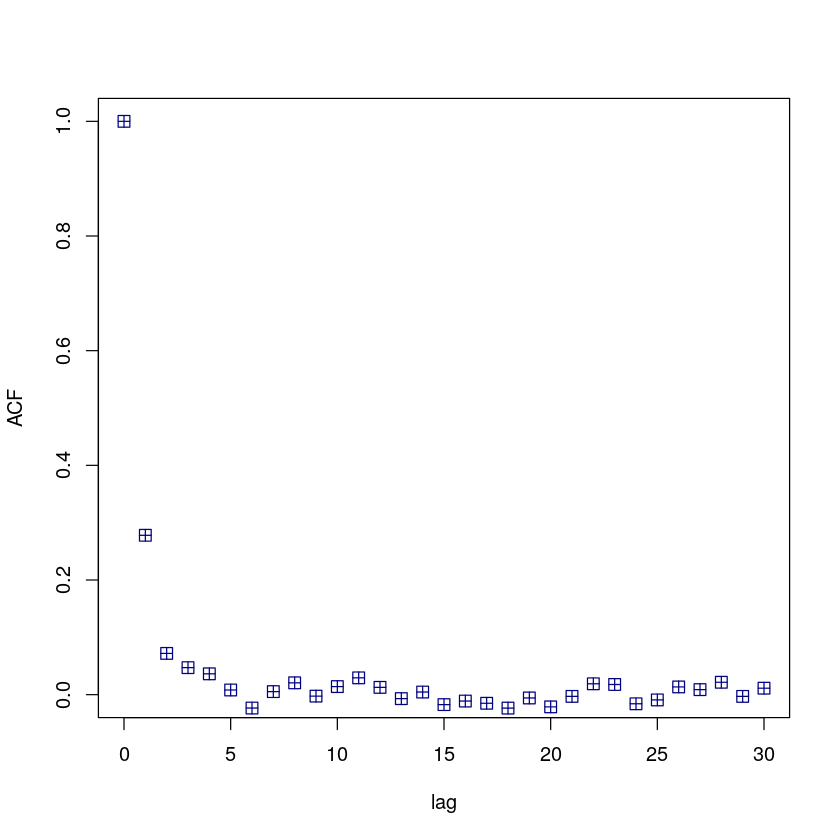

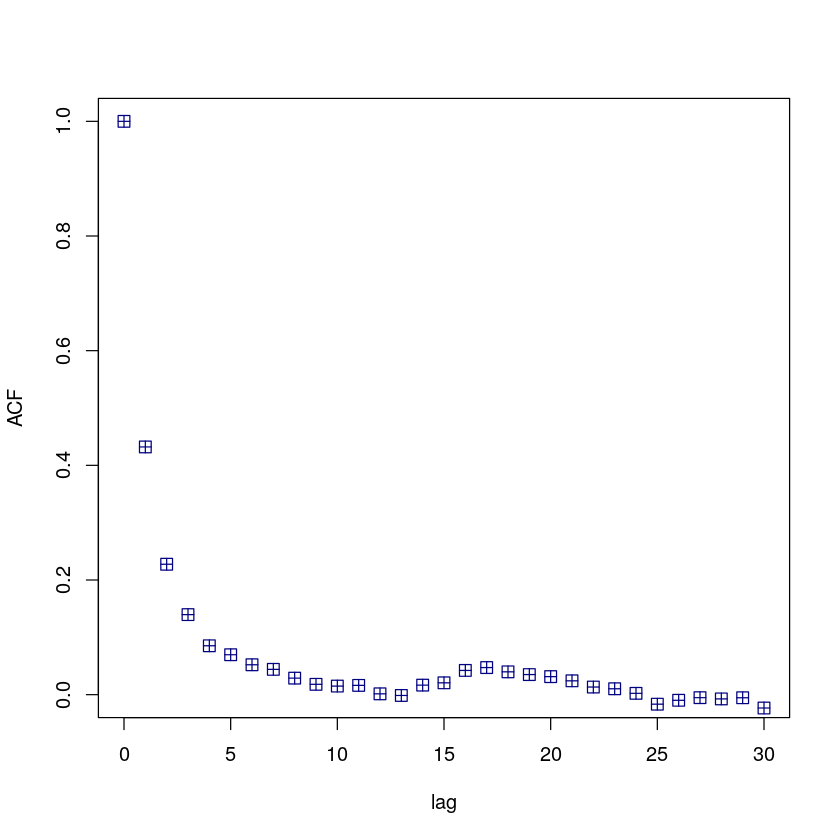

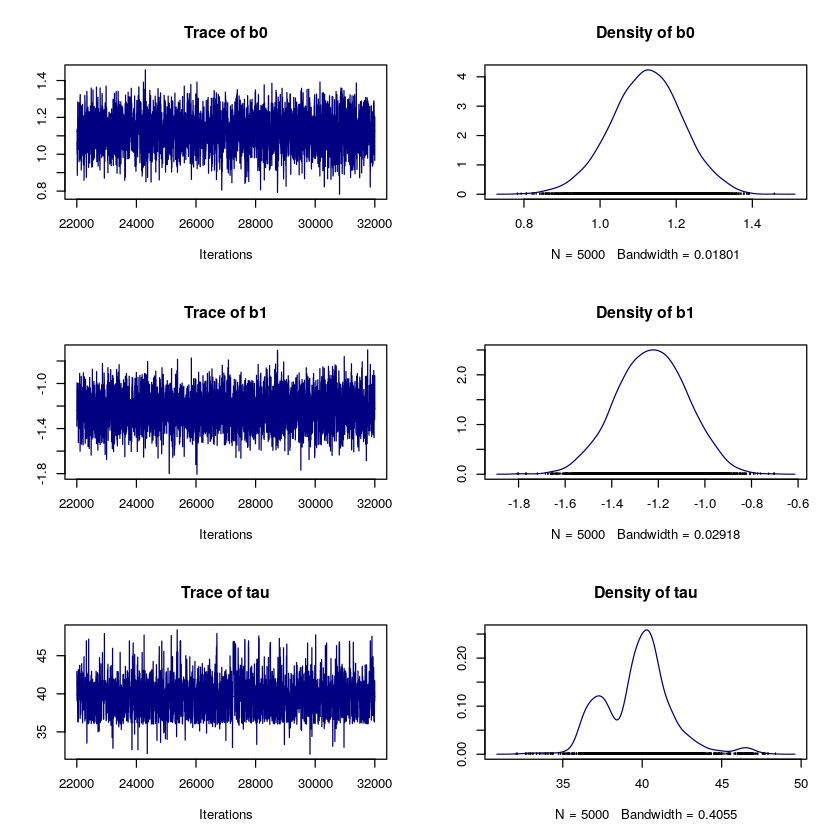

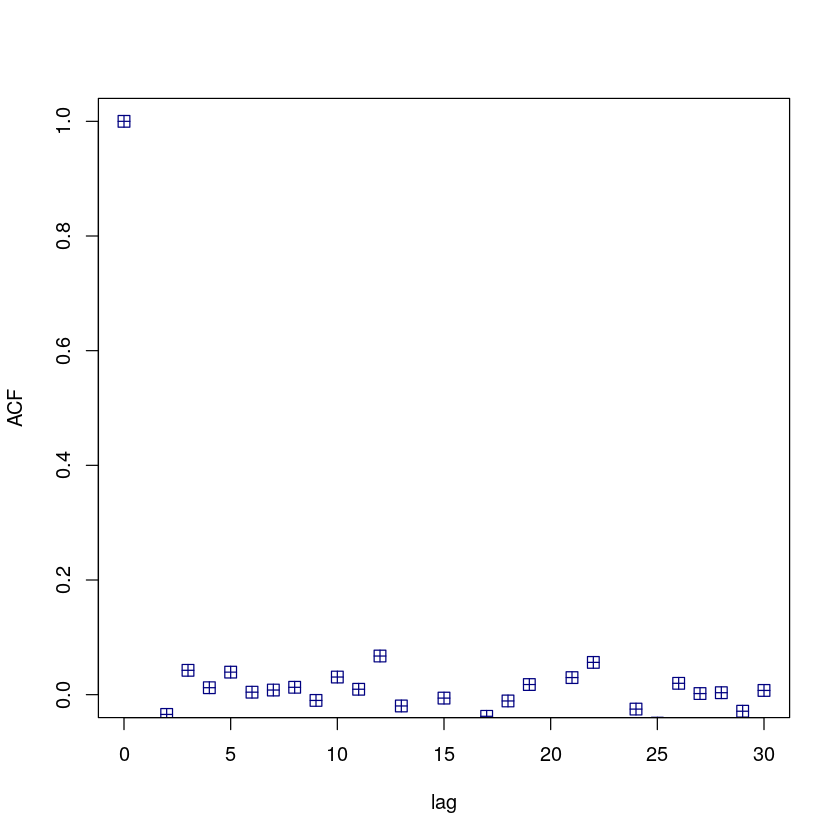

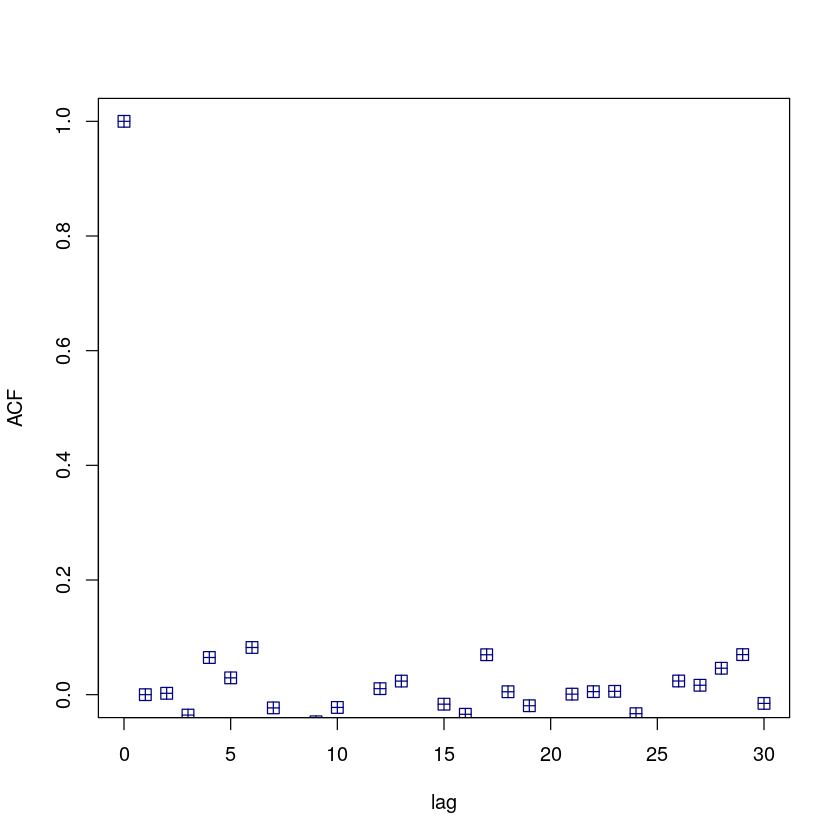

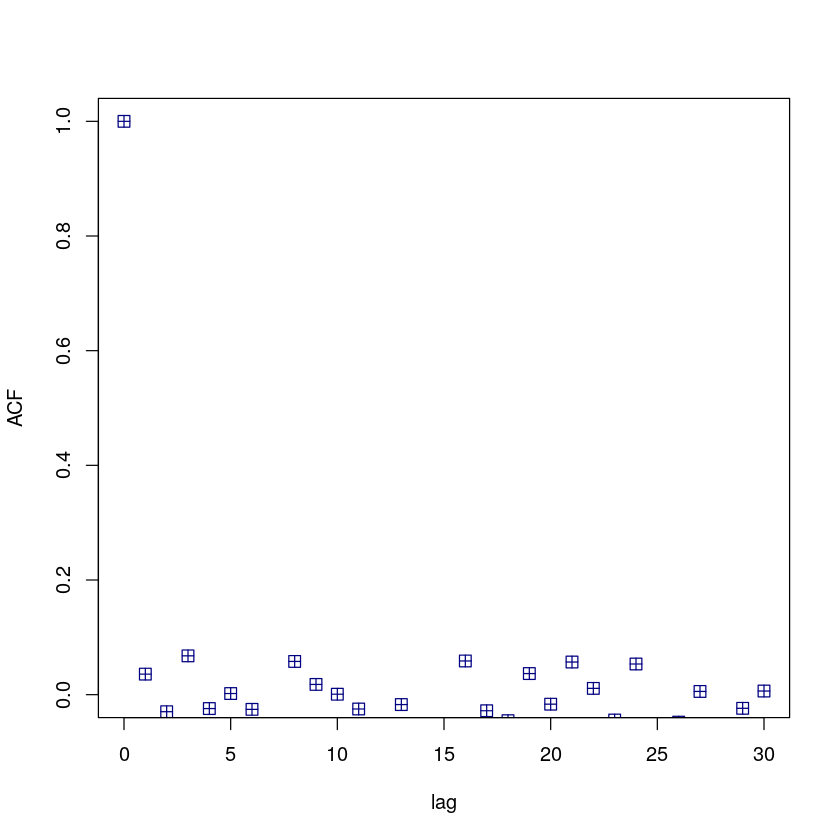

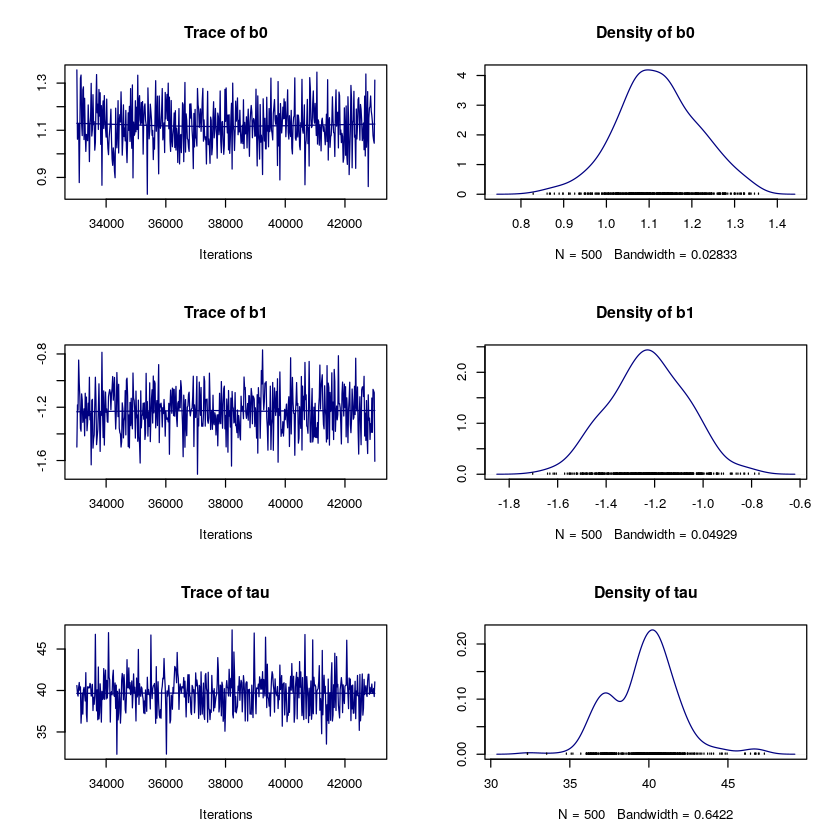

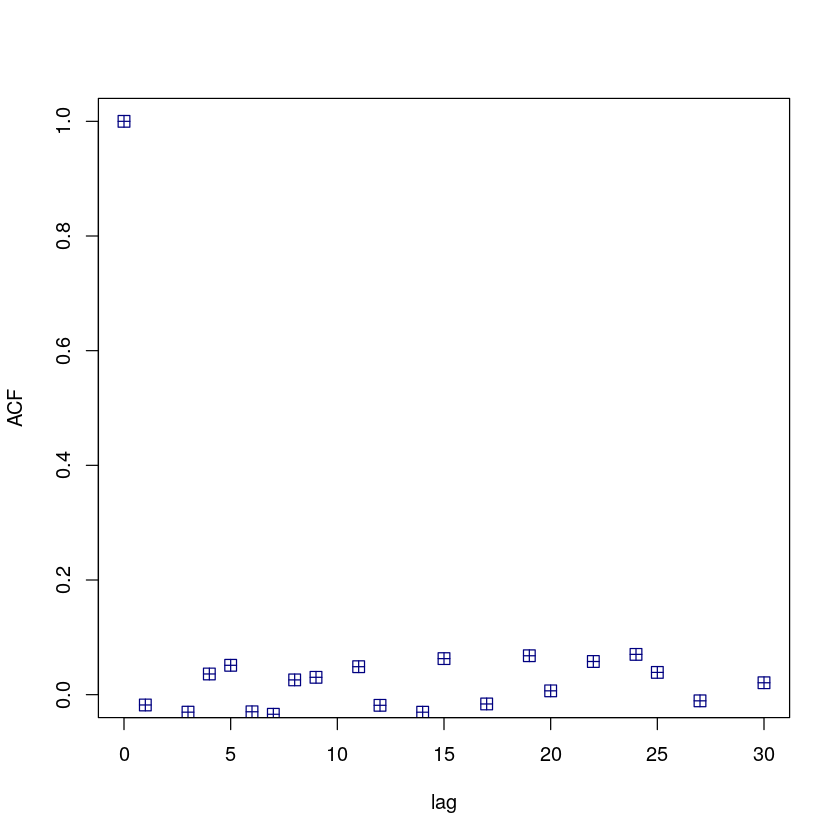

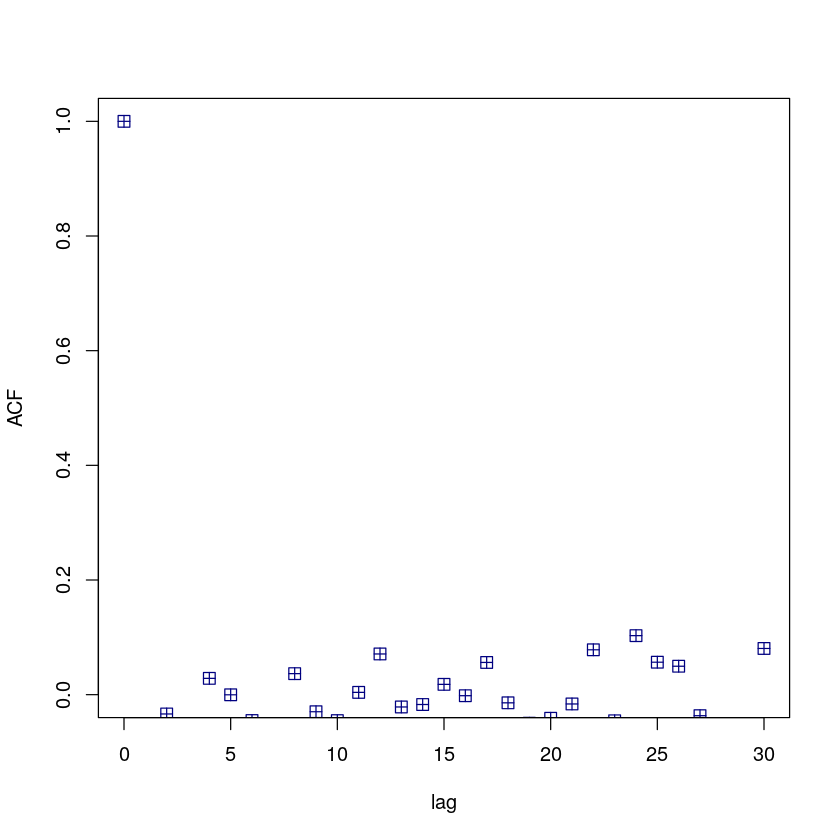

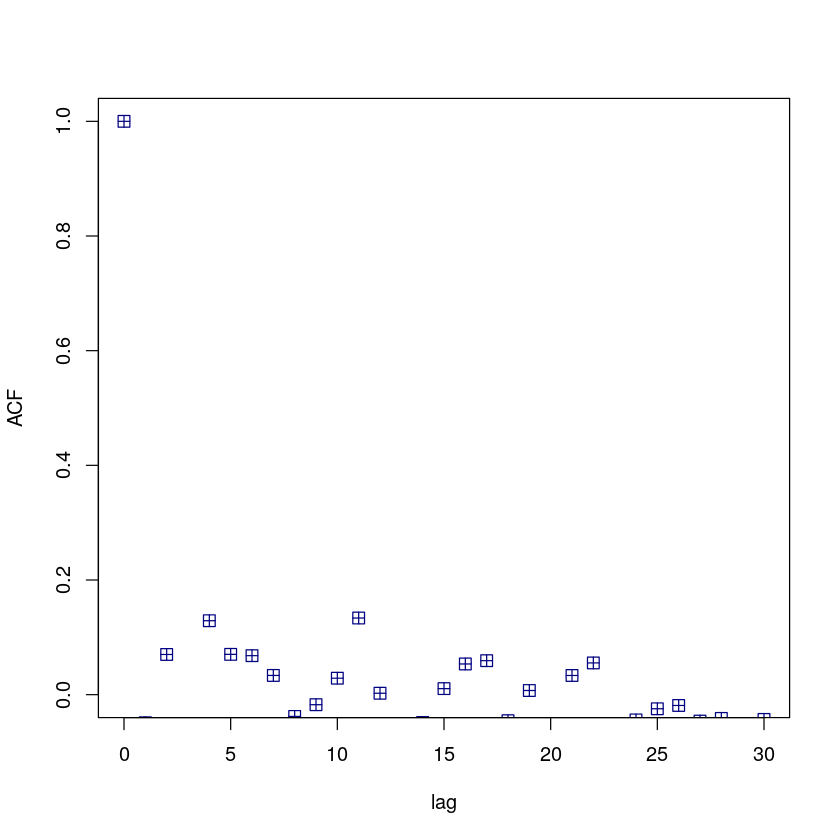

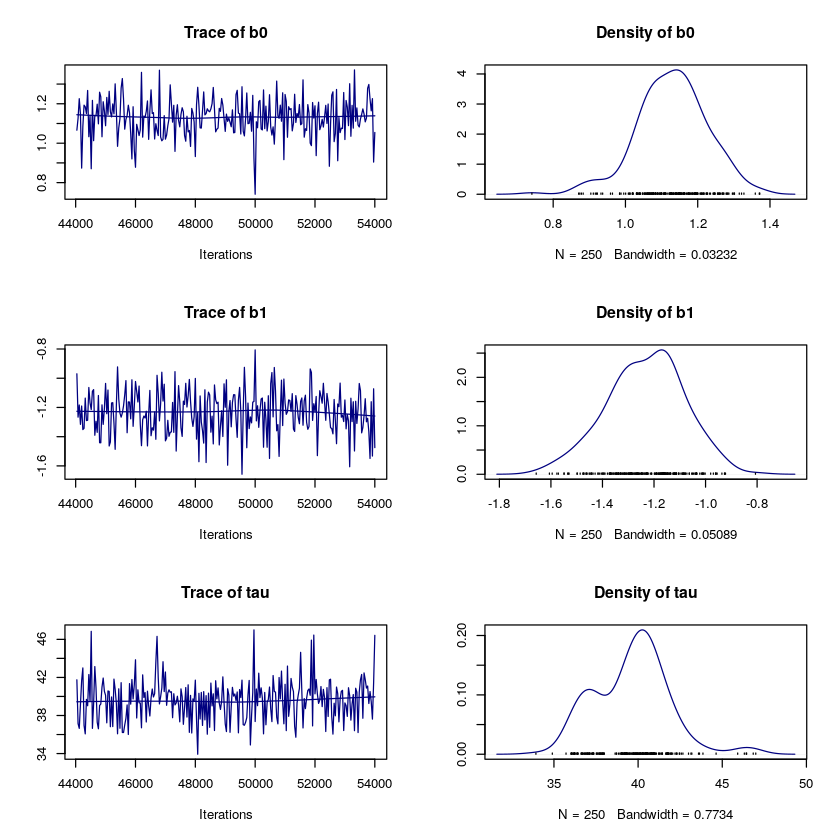

In [101]:
# Fixed burn-in, different values of thinning 
for(i in 1:length(thinning))
    {
    update(jm, 1000)
    chain1 <- coda.samples(jm, c("b0", "b1","tau"),
    n.iter = 10000, thin = thinning[i])
    chain1.df <- as.data.frame( as.mcmc(chain1) )
    
    b0.chain<-as.mcmc(chain1.df["b0"])
    b1.chain<-as.mcmc(chain1.df["b1"])
    tau.chain<-as.mcmc(chain1.df["tau"])
    
    my.lags<-seq(0,30,1)
#     par(mfrow=c(1,3),mai=c(3.6,0.52,1.54,0.27),omi=c(0,0,0,0))
    y1.b0<-autocorr(b0.chain, lags=my.lags)
    plot(my.lags , y1.b0, ylim=c(0,1),
    pch=12, col="navy",
    xlab="lag", ylab="ACF", cex=1.3)
#    text(400,0.95, paste('sigma=10'))
#    text(500,0.88, pos=2, sprintf("effective size: %.2f", effectiveSize(chain1)))

    y1.b1<-autocorr(b1.chain, lags=my.lags)
    plot(my.lags , y1.b1, ylim=c(0,1),
    pch=12, col="navy",
    xlab="lag", ylab="ACF", cex=1.3)
#    text(400,0.95, paste('sigma=10'))
#    text(500,0.88, pos=2, sprintf("effective size: %.2f", effectiveSize(chain1)))

    y1.tau<-autocorr(tau.chain, lags=my.lags)
    plot(my.lags , y1.tau, ylim=c(0,1),
    pch=12, col="navy",
    xlab="lag", ylab="ACF", cex=1.3)
#    text(400,0.95, paste('sigma=10'))
#    text(500,0.88, pos=2, sprintf("effective size: %.2f", effectiveSize(chain1)))
    plot(chain1 , col="navy")
}

The samples in the chain can show some degree of correlation as the process to get the chain is not totally random. Because of it could be a problem using thinning we thinning Kth sample in the chain. We can see that in our case we obtain good results with no thinning or thinning=2, while discarding too many values from the chain the result becomes very unstable   

In [58]:
burn.in=c(1,1000,10000,100000)

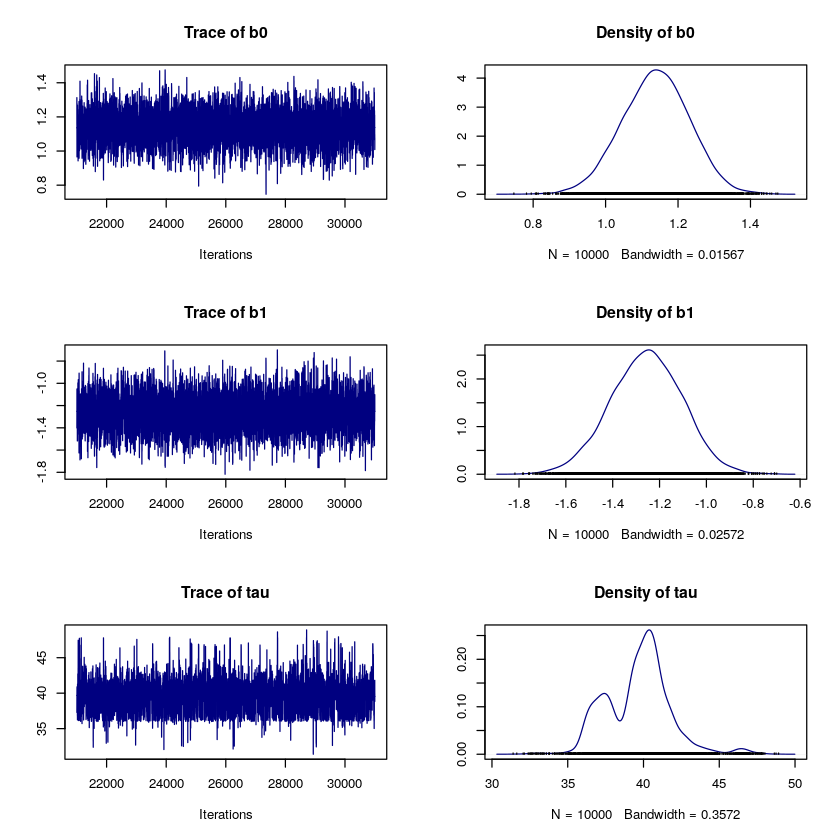

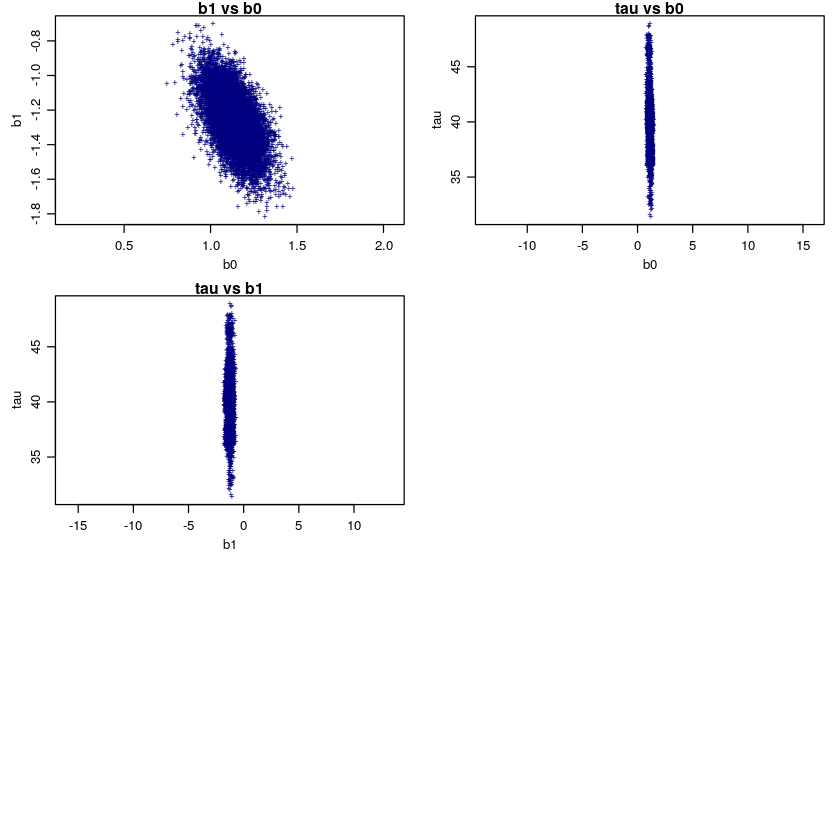

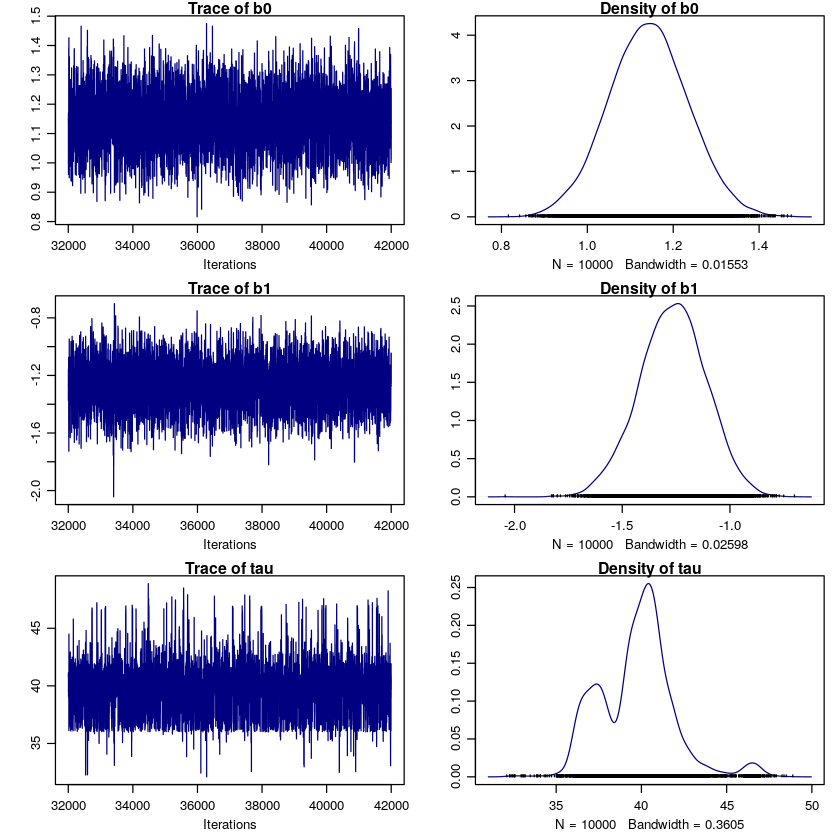

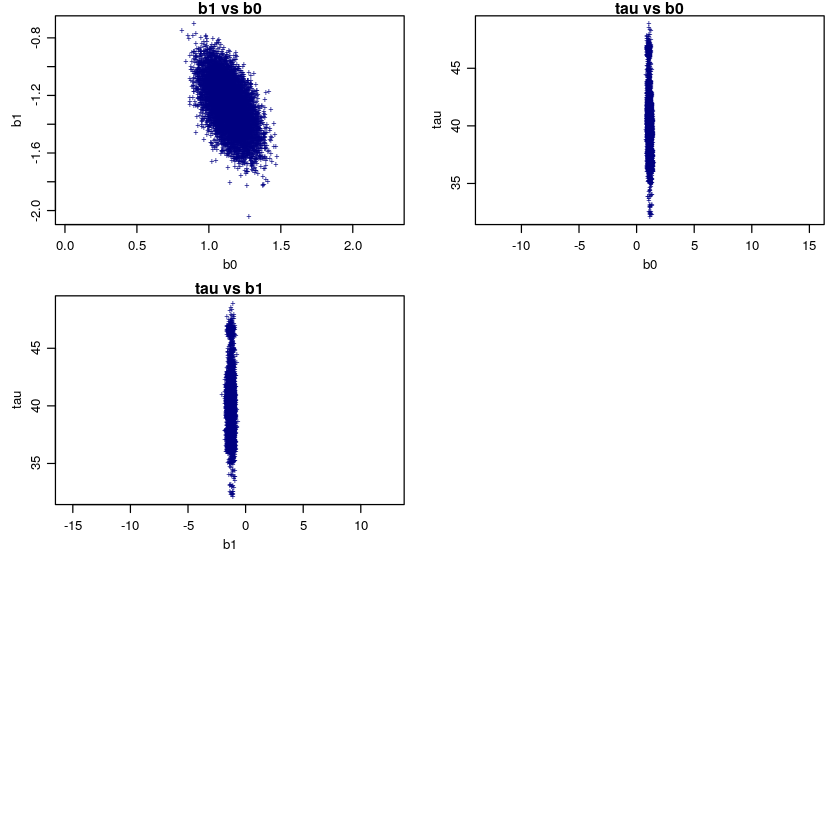

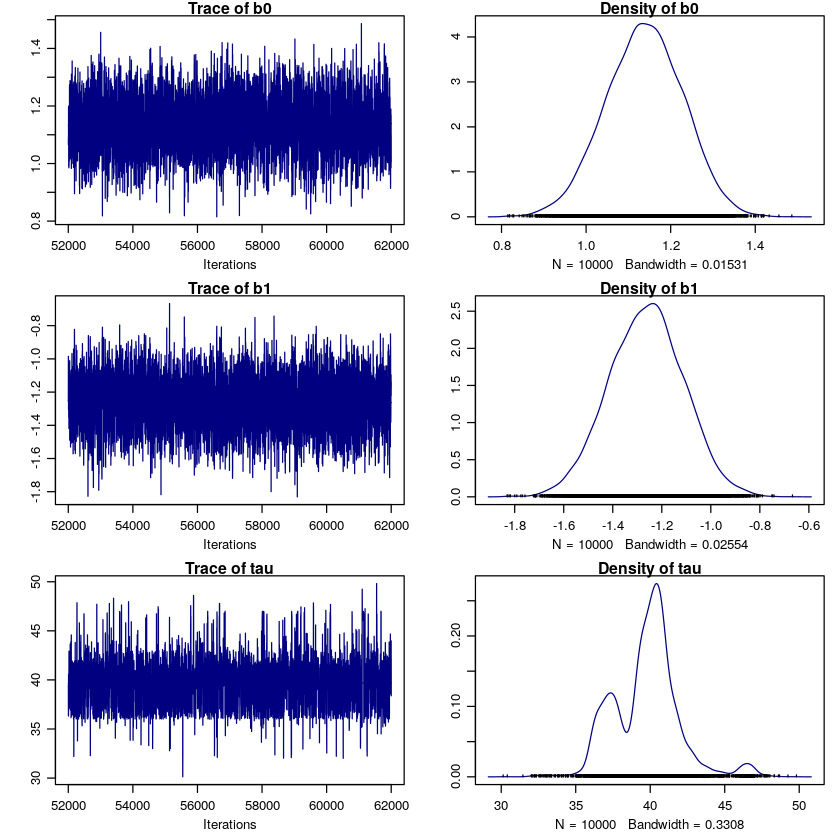

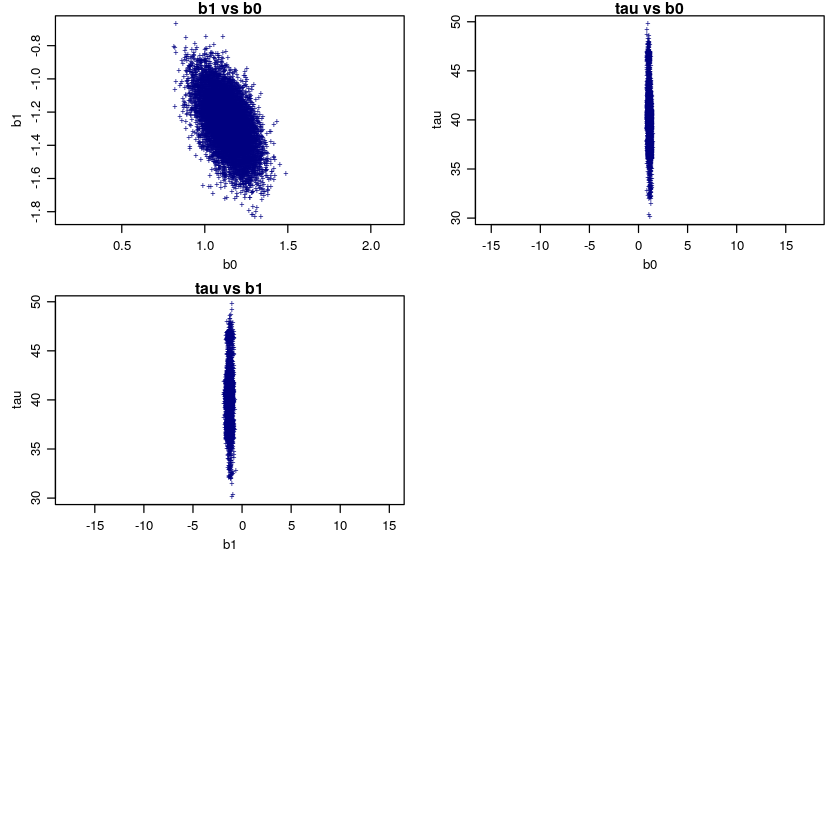

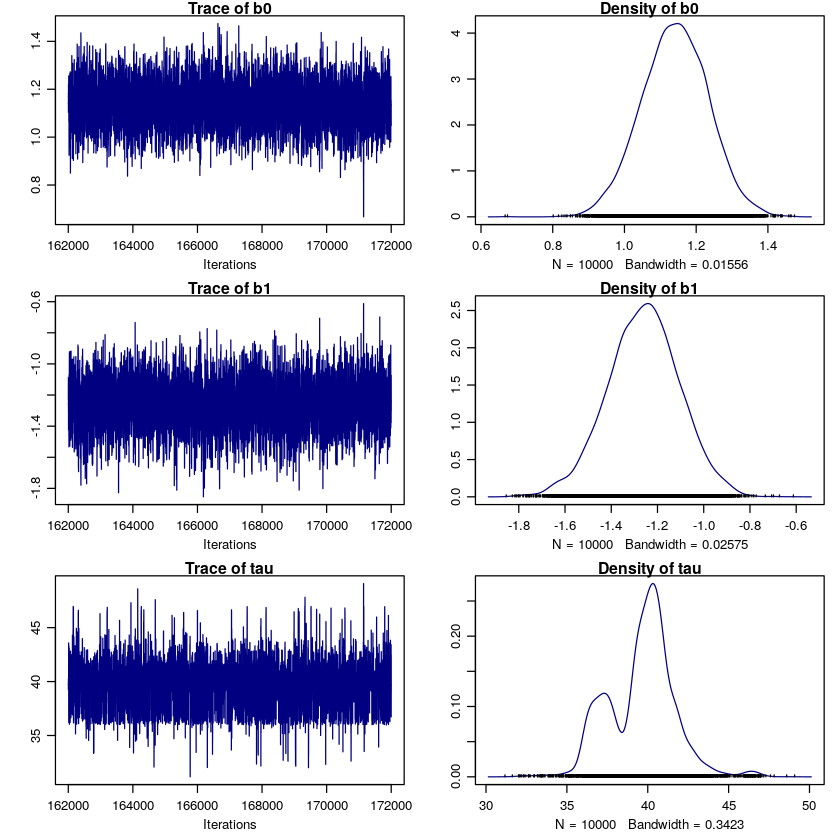

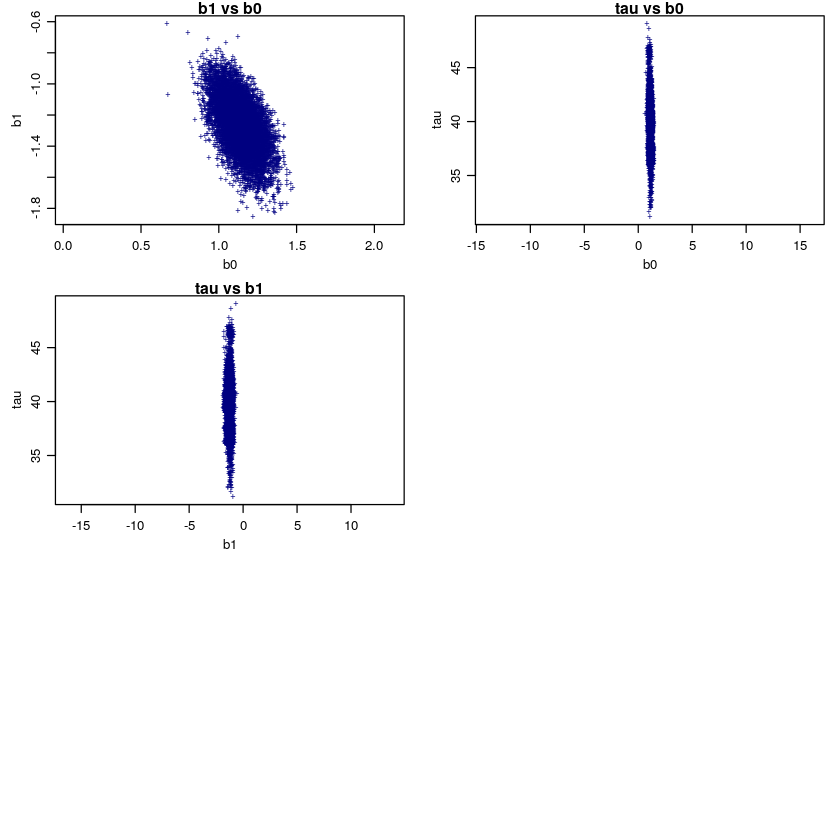

In [87]:
# Fixed thinning, different values of burn-in 
for(i in 1:length(burn.in))
    {
    update(jm, burn.in[i])
    chain1 <- coda.samples(jm, c("b0", "b1","tau"),
    n.iter = 10000)
    plot(chain1 , col="navy")
    # Let’s format our chain
    chain1.df <- as.data.frame( as.mcmc(chain1) )

# #     Probability plots
    par(mfrow=c(3,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1))
    plot(chain1.df$b0 , chain1.df$b1, xlab="b0", ylab="b1", main="b1 vs b0",
    pch="+", col="navy", cex=0.75, asp=1)
    
    plot(chain1.df$b0 , chain1.df$tau, xlab="b0", ylab="tau", main="tau vs b0",
    pch="+", col="navy", cex=0.75, asp=1)
    
    plot(chain1.df$b1 , chain1.df$tau, xlab="b1", ylab="tau", main="tau vs b1",
    pch="+", col="navy", cex=0.75, asp=1)
}

If the chain is not inizialized properly it can happen that initial samples may
not be representative of the distribution. For this reason we throw away them and those are called burn-in. I can't see any relevant differences for the burn in parameters 1,1000,10000,100000, it may tell us that the initialization is appropriate. 